In [1]:
import os
import warnings

# Fix KMeans MKL warning on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Completely suppress sklearn warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


###### Load The datadset


In [8]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Check

In [11]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

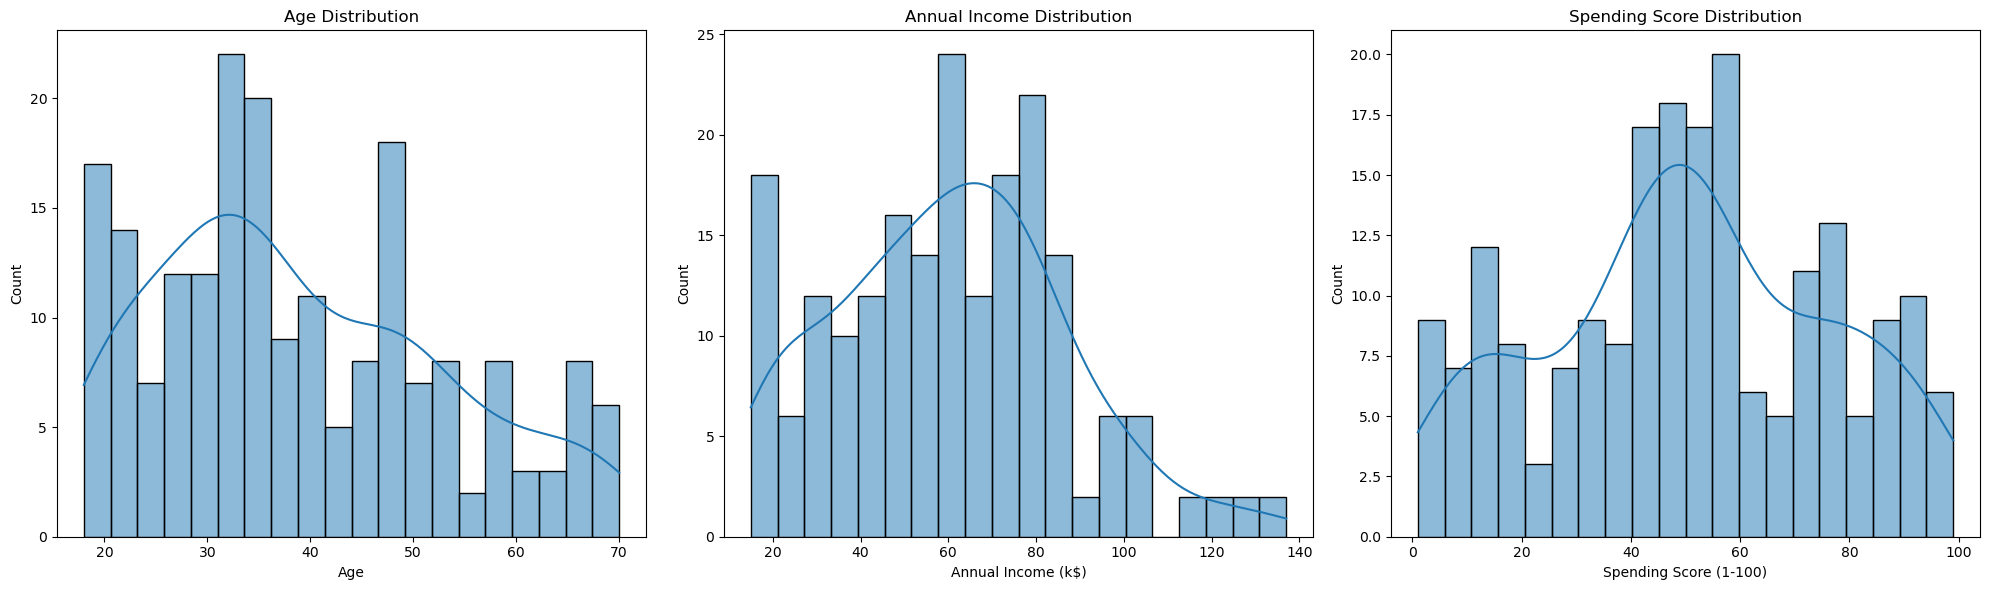

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()


# Feature Selection

In [15]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# feature scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elbow method

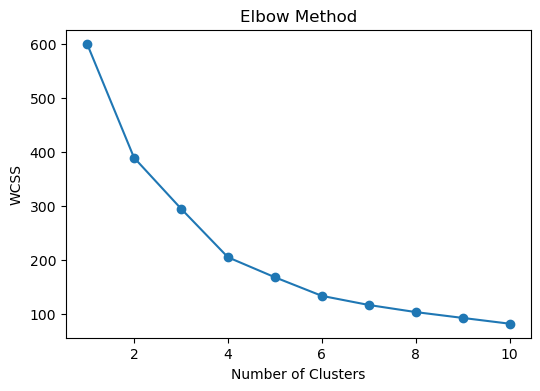

In [19]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# K - Means

In [21]:
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

df['Cluster'] = kmeans.fit_predict(X_scaled)


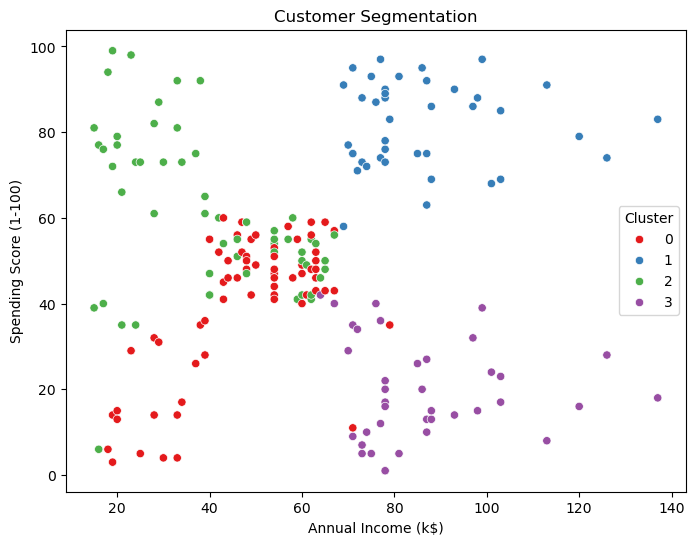

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title('Customer Segmentation')
plt.show()


In [27]:
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,69.415385,53.984615,47.707692,39.969231
1,161.025000,32.875000,86.100000,81.525000
2,53.438596,25.438596,40.000000,60.298246
3,160.552632,39.368421,86.500000,19.578947


In [29]:
df.to_csv("Customer_Segments.csv", index=False)
